# How do circulation anomalies of SEAS5 compare to ERA5?

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##import packages
import os
import cdsapi ## check the current working directory, which should be the UNSEEN-open directory
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs

In [3]:
SEAS5_mslp_mean = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/timmean.ensmean.SEAS5_mslp.SON.nc')
SEAS5_mslp_mean

SEAS5_g500_mean = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/timmean.ensmean.SEAS5_g500.SON.nc')
SEAS5_g500_mean

SEAS5_events = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/MSLP-G500_SEAS5events.nc')
SEAS5_events

ERA5_events = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/MSLP-G500_ERA5events.nc')
ERA5_events = ERA5_events.assign_coords({'time': np.arange(1981,2019)})
ERA5_events

# ERA5_mslp_mean = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/timmean.ERA5_SLP_1981_2016_SON.nc')
# ERA5_mslp_mean

ERA5_mslp = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/ERA5_SLP_1979_2018_SON.nc')
ERA5_mslp_mean = ERA5_mslp['MSL'].sel(time=slice('1981','2016')).mean('time')


ERA5_g500_mean = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/timmean.ERA5_500hPa_geopotential_1981_2016_SON.nc')
ERA5_g500_mean


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 360, lon: 1440, time: 1)
Coordinates:
  * lon        (lon) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * lat        (lat) float32 0.125 0.375 0.625 0.875 ... 89.375 89.625 89.875
  * time       (time) datetime64[ns] 1999-10-16
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    MSL        (time, lat, lon) float32 ...
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Mon Sep 21 19:57:27 2020: cdo timmean ti...
    institution:                     European Centre for Medium-Range Weather...
    CDO:                             Climate Data Operators version 1.7.0 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 360, lon: 1440, plev: 1, time: 1)
Coordinates:
  * lon                  (lon) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
  * lat                  (lat) float64 0.125 0.375 0.625 ... 89.38 89.62 89.88
  * plev                 (plev) float64 5e+04
  * time                 (time) datetime64[ns] 2000-04-01T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds            (time, bnds) datetime64[ns] ...
    geopotential_500hPa  (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Mon May 18 11:42:51 2020: cdo timmean se...
    institution:                     European Centre for Medium-Range Weather...
    NCO:                             netCDF Operators version 4.7.8 (Homepage...
    CDO:                             Climate Data Operators version 1.7.0 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 1440, time: 350)
Coordinates:
  * time     (time) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * lat      (lat) float32 30.125 30.375 30.625 30.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
Data variables:
    g500     (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
Attributes:
    DODS_EXTRA.Unlimited_Dimension:  time

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 1440, time: 38)
Coordinates:
  * time     (time) int32 1981 1982 1983 1984 1985 ... 2014 2015 2016 2017 2018
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
Data variables:
    g500     (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
Attributes:
    DODS_EXTRA.Unlimited_Dimension:  time

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 360, lon: 1440, plev: 1, time: 1)
Coordinates:
  * lon                  (lon) float32 -180.0 -179.75 -179.5 ... 179.5 179.75
  * lat                  (lat) float32 0.125 0.375 0.625 ... 89.625 89.875
  * plev                 (plev) float64 5e+04
  * time                 (time) datetime64[ns] 1999-04-16T23:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds            (time, bnds) datetime64[ns] ...
    geopotential_500hPa  (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Wed Sep 23 14:14:22 2020: cdo timmean ER...
    institution:                     European Centre for Medium-Range Weather...
    NCO:                             "4.5.4"
    nco_openmp_thread_number:        1
    CDO:                             Climate Data Operators version 1.7.0 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
ERA5_mslp_anomaly = (ERA5_events['msl'] - ERA5_mslp_mean) / 100 ## Pa to HPa
ERA5_mslp_anomaly.attrs = {'long_name': 'Sea-level pressure anomaly',
                            'units': 'HPa'}
ERA5_mslp_anomaly

ERA5_g500_anomaly = (ERA5_events['g500'] - ERA5_g500_mean['geopotential_500hPa'].squeeze(['plev','time'])) / 100 ## Pa to HPa
ERA5_g500_anomaly



<xarray.DataArray (time: 38, lat: 360, lon: 1440)>
array([[[ -1.3679688 ,  -1.3603125 ,  -1.3579688 , ...,  -1.3870312 ,
          -1.3847656 ,  -1.376875  ],
        [ -1.3989062 ,  -1.3916407 ,  -1.3884375 , ...,  -1.4066406 ,
          -1.4119531 ,  -1.4083594 ],
        [ -1.4314063 ,  -1.4230468 ,  -1.4194531 , ...,  -1.41875   ,
          -1.4330468 ,  -1.4364063 ],
        ...,
        [ 25.784609  ,  25.7825    ,  25.780703  , ...,  25.789845  ,
          25.78797   ,  25.786327  ],
        [ 25.568516  ,  25.567188  ,  25.566172  , ...,  25.571405  ,
          25.57039   ,  25.56953   ],
        [ 25.421328  ,  25.420626  ,  25.419765  , ...,  25.422344  ,
          25.421797  ,  25.421328  ]],

       [[ -1.5255469 ,  -1.5191406 ,  -1.5139843 , ...,  -1.5092187 ,
          -1.514375  ,  -1.5236719 ],
        [ -1.4985156 ,  -1.5014062 ,  -1.5026562 , ...,  -1.4707031 ,
          -1.4760156 ,  -1.4896094 ],
        [ -1.4598438 ,  -1.4733593 ,  -1.4902344 , ...,  -1.4446094 ,
          -1.4435937 ,  -1.4521875 ],
...
        [  3.0307813 ,   3.028203  ,   3.0259376 , ...,   3.0377343 ,
           3.0353124 ,   3.033047  ],
        [  3.0523438 ,   3.0508595 ,   3.0496094 , ...,   3.0564063 ,
           3.055     ,   3.05375   ],
        [  3.0754688 ,   3.0746093 ,   3.0738282 , ...,   3.0771093 ,
           3.0761719 ,   3.0754688 ]],

       [[  0.6357812 ,   0.63507813,   0.6382812 , ...,   0.6183594 ,
           0.6264844 ,   0.6319531 ],
        [  0.6453125 ,   0.64835936,   0.6507813 , ...,   0.61609375,
           0.6276562 ,   0.63703126],
        [  0.6478125 ,   0.656875  ,   0.6603906 , ...,   0.6133594 ,
           0.62453127,   0.6365625 ],
        ...,
        [ -0.85328126,  -0.8570312 ,  -0.8605469 , ...,  -0.8414062 ,
          -0.84546876,  -0.849375  ],
        [ -0.6308594 ,  -0.63328123,  -0.63539064, ...,  -0.6238281 ,
          -0.62625   ,  -0.6285156 ],
        [ -0.47757813,  -0.4789844 ,  -0.48046875, ...,  -0.474375  ,
          -0.47609374,  -0.4775    ]]], dtype=float32)
Coordinates:
  * time     (time) int32 1981 1982 1983 1984 1985 ... 2014 2015 2016 2017 2018
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
Attributes:
    long_name:  Sea-level pressure anomaly
    units:      HPa

<xarray.DataArray (time: 38, lat: 360, lon: 1440)>
array([[[ -1.5340625 ,  -1.5401171 ,  -1.5463281 , ...,  -1.5107422 ,
          -1.52      ,  -1.5273046 ],
        [ -1.5332422 ,  -1.5388281 ,  -1.5440625 , ...,  -1.50875   ,
          -1.5190234 ,  -1.5267187 ],
        [ -1.5291016 ,  -1.5347656 ,  -1.5385938 , ...,  -1.5036328 ,
          -1.5142188 ,  -1.5223829 ],
        ...,
        [ 20.667149  ,  20.664648  ,  20.662188  , ...,  20.674414  ,
          20.672031  ,  20.66957   ],
        [ 20.265274  ,  20.263866  ,  20.26246   , ...,  20.269375  ,
          20.268047  ,  20.26668   ],
        [ 20.        ,  19.99918   ,  19.99832   , ...,  20.00168   ,
          20.00082   ,  20.        ]],

       [[ -1.0778126 ,  -1.0775391 ,  -1.0820312 , ...,  -1.1283984 ,
          -1.1083593 ,  -1.09125   ],
        [ -1.1216016 ,  -1.1126953 ,  -1.1165625 , ...,  -1.1757421 ,
          -1.1610547 ,  -1.1423438 ],
        [ -1.1828907 ,  -1.1666797 ,  -1.1653515 , ...,  -1.2260547 ,
          -1.2240624 ,  -1.20625   ],
...
        [ 18.489687  ,  18.482578  ,  18.475548  , ...,  18.511211  ,
          18.503984  ,  18.496798  ],
        [ 19.470625  ,  19.466562  ,  19.46254   , ...,  19.48297   ,
          19.478828  ,  19.474688  ],
        [ 20.078438  ,  20.075937  ,  20.073399  , ...,  20.083593  ,
          20.081017  ,  20.078438  ]],

       [[  1.7322266 ,   1.7389454 ,   1.7440234 , ...,   1.695     ,
           1.7085156 ,   1.7211719 ],
        [  1.7413281 ,   1.751836  ,   1.7596484 , ...,   1.6974609 ,
           1.7126172 ,   1.7273047 ],
        [  1.7454296 ,   1.7611718 ,   1.7723047 , ...,   1.6972656 ,
           1.7128125 ,   1.7288672 ],
        ...,
        [  0.61398435,   0.6148437 ,   0.6157422 , ...,   0.6114453 ,
           0.6123047 ,   0.613125  ],
        [  0.7970703 ,   0.7975    ,   0.79796875, ...,   0.7958203 ,
           0.79625   ,   0.79664063],
        [  0.93964845,   0.9398828 ,   0.94007814, ...,   0.93921876,
           0.9394141 ,   0.93960935]]], dtype=float32)
Coordinates:
  * time     (time) int32 1981 1982 1983 1984 1985 ... 2014 2015 2016 2017 2018
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
    plev     float64 5e+04

In [7]:
SEAS5_mslp_anomaly = (SEAS5_events['msl'] - SEAS5_mslp_mean['MSL'].sel(lat = slice(30,90)).squeeze('time')) / 100 ## Pa to HPa
SEAS5_g500_anomaly = (SEAS5_events['g500'] - SEAS5_g500_mean['geopotential_500hPa'].sel(lat = slice(30,90)).squeeze(['plev','time'])) / 100 ## dm to dam

SEAS5_mslp_anomaly.attrs = {'long_name': 'Sea-level pressure anomaly',
                            'units': 'HPa'}
SEAS5_mslp_anomaly
SEAS5_g500_anomaly

<xarray.DataArray (time: 350, lat: 240, lon: 1440)>
array([[[ 7.33968735e+00,  7.35375023e+00,  7.35281229e+00, ...,
          7.24593735e+00,  7.27429676e+00,  7.30546856e+00],
        [ 7.46898460e+00,  7.49281263e+00,  7.50007820e+00, ...,
          7.38390636e+00,  7.40265608e+00,  7.43101549e+00],
        [ 7.58671856e+00,  7.62265635e+00,  7.64078140e+00, ...,
          7.48929691e+00,  7.50726557e+00,  7.53984356e+00],
        ...,
        [-6.25164080e+00, -6.24875021e+00, -6.24578142e+00, ...,
         -6.26117182e+00, -6.25796890e+00, -6.25484371e+00],
        [-6.41867208e+00, -6.41679668e+00, -6.41492176e+00, ...,
         -6.42515612e+00, -6.42296886e+00, -6.42085934e+00],
        [-6.53984356e+00, -6.53843737e+00, -6.53710938e+00, ...,
         -6.54296875e+00, -6.54140615e+00, -6.53984356e+00]],

       [[-1.82500005e-01, -2.34218746e-01, -2.71484375e-01, ...,
          5.15625020e-03, -5.23437485e-02, -1.14843749e-01],
        [-1.63828120e-01, -2.03749999e-01, -2.27343753e-01, ...,
          3.70312482e-02, -2.68750004e-02, -9.37500000e-02],
        [-1.22343749e-01, -1.56328127e-01, -1.72578126e-01, ...,
          8.74218717e-02,  1.92187503e-02, -5.07031232e-02],
...
         -4.27859354e+00, -4.27687502e+00, -4.27515602e+00],
        [-4.47281265e+00, -4.47273445e+00, -4.47257805e+00, ...,
         -4.47484398e+00, -4.47414064e+00, -4.47351551e+00],
        [-4.61484385e+00, -4.61476564e+00, -4.61476564e+00, ...,
         -4.61523438e+00, -4.61499977e+00, -4.61484385e+00]],

       [[-5.06874979e-01, -4.92734373e-01, -4.72109377e-01, ...,
         -4.19062495e-01, -4.56093758e-01, -4.85624999e-01],
        [-6.11328125e-01, -6.11093760e-01, -6.03124976e-01, ...,
         -5.66640615e-01, -5.83359361e-01, -5.98281264e-01],
        [-7.16875017e-01, -7.21562505e-01, -7.17187524e-01, ...,
         -7.22734392e-01, -7.20703125e-01, -7.18750000e-01],
        ...,
        [ 9.99531269e-01,  9.97421861e-01,  9.95390654e-01, ...,
          1.00414062e+00,  1.00257814e+00,  1.00101566e+00],
        [ 9.08046901e-01,  9.06718731e-01,  9.05468762e-01, ...,
          9.11249995e-01,  9.10156250e-01,  9.09062505e-01],
        [ 8.42578113e-01,  8.41718733e-01,  8.40859354e-01, ...,
          8.44062507e-01,  8.43359351e-01,  8.42578113e-01]]],
      dtype=float32)
Coordinates:
  * time     (time) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * lat      (lat) float32 30.125 30.375 30.625 30.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
Attributes:
    long_name:  Sea-level pressure anomaly
    units:      HPa

<xarray.DataArray (time: 350, lat: 240, lon: 1440)>
array([[[  3.761953 ,   3.674375 ,   3.5915234, ...,   3.975078 ,
           3.912461 ,   3.842383 ],
        [  3.7397265,   3.6494532,   3.5614452, ...,   3.943711 ,
           3.8857813,   3.8184376],
        [  3.6858203,   3.5932813,   3.5011327, ...,   3.8864453,
           3.8307421,   3.7641797],
        ...,
        [-15.940976 , -15.936641 , -15.932383 , ..., -15.953984 ,
         -15.949649 , -15.945273 ],
        [-16.273554 , -16.270664 , -16.268126 , ..., -16.281563 ,
         -16.278671 , -16.276094 ],
        [-16.393476 , -16.390156 , -16.387148 , ..., -16.399843 ,
         -16.396523 , -16.393476 ]],

       [[  1.1419922,   1.1217579,   1.0969532, ...,   1.1761328,
           1.1639844,   1.1535547],
        [  1.1602343,   1.1414063,   1.1184765, ...,   1.1948047,
           1.1840234,   1.173125 ],
        [  1.1720313,   1.1552343,   1.1352735, ...,   1.2035546,
           1.195586 ,   1.1853906],
...
        [-14.372344 , -14.372109 , -14.371953 , ..., -14.373086 ,
         -14.372851 , -14.372578 ],
        [-14.848242 , -14.84793  , -14.847969 , ..., -14.848594 ,
         -14.848242 , -14.848242 ],
        [-15.017265 , -15.016953 , -15.016993 , ..., -15.017578 ,
         -15.017265 , -15.017265 ]],

       [[  3.371289 ,   3.422461 ,   3.4759765, ...,   3.2160938,
           3.2676563,   3.3203516],
        [  3.1745312,   3.2253907,   3.2785156, ...,   3.0182421,
           3.0712109,   3.1239452],
        [  2.9639845,   3.0139062,   3.0653515, ...,   2.806172 ,
           2.8605077,   2.9134376],
        ...,
        [-17.1325   , -17.13254  , -17.132618 , ..., -17.132305 ,
         -17.132383 , -17.132421 ],
        [-17.00672  , -17.006563 , -17.00672  , ..., -17.006523 ,
         -17.006407 , -17.006563 ],
        [-16.963282 , -16.963125 , -16.963282 , ..., -16.963203 ,
         -16.963085 , -16.963282 ]]], dtype=float32)
Coordinates:
  * time     (time) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * lat      (lat) float32 30.125 30.375 30.625 30.875 ... 89.375 89.625 89.875
  * lon      (lon) float32 -180.0 -179.75 -179.5 -179.25 ... 179.25 179.5 179.75
    plev     float64 5e+04

In [11]:
### Set extent and projection
plt.rcParams["font.family"] = "Arial" ##change font
plt.rcParams['font.size'] = 7  ## change font size
plt.rcParams['svg.fonttype'] = 'none' ## so inkscape recognized texts in svg file 

Text(0.5, 1.0, 'ERA5 2005')

Text(0.5, 1.0, 'ERA5 2014')

Text(0.5, 1.0, 'SEAS5 composites')

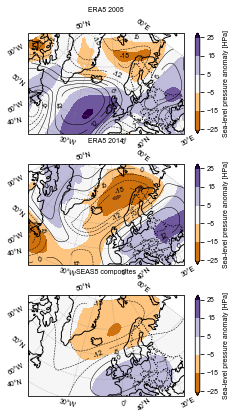

In [20]:
extent_z500 = [-50, 30, 35, 80]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(35, 60.0))
# map_proj = ccrs.Robinson()

### Initiate graph
fig, axes = plt.subplots(3,figsize=(90/25.4,160/25.4),subplot_kw={'projection': map_proj})

## Plot ERA5 events
# axes[0] = plt.subplot(311,projection=map_proj)
axes[0].set_extent(extent_z500)
axes[0].coastlines(resolution='110m')
axes[0].add_feature(cartopy.feature.BORDERS, linestyle=':')
# ERA5_events['msl'].sel(time=2005).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contourf = ERA5_mslp_anomaly.sel(lon = slice(-90,60),  
                      lat = slice(extent_z500[2],extent_z500[3]),
                      time=2005).plot.contourf(levels= [-25, -15, -5,  5, 15, 25], ##Specify contourf for size reduction
                                      extend = 'both',
                                      transform=ccrs.PlateCarree(),
                                      cmap=plt.cm.PuOr,
                                      ax=axes[0],
                                      cbar_kwargs = {'label' : 'Sea-level pressure anomaly [HPa]'}
                                     )

# for pathcoll in contourf.collections: ##Rasterize filled contours for size reduction
#     pathcoll.set_rasterized(True)
    
contours=ERA5_g500_anomaly.sel(lon = slice(-90,60),
                               lat = slice(extent_z500[2],extent_z500[3]),
                               time=2005).plot.contour(levels=range(-24, 24, 6),
                                                       add_labels =True,
                                                       transform=ccrs.PlateCarree(),
                                                       colors = 'black',
                                                       ax=axes[0],
                                                       linewidths = 0.5
                                                      )
plt.clabel(contours, inline=1, fontsize=7, fmt="%i")
gl=axes[0].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}
axes[0].set_title('ERA5 2005', fontsize = 7)

# axes[1] = plt.subplot(312,projection=map_proj)
axes[1].set_extent(extent_z500)
axes[1].coastlines(resolution='110m')
axes[1].add_feature(cartopy.feature.BORDERS, linestyle=':')
# ERA5_events['msl'].sel(time=2005).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contourf = ERA5_mslp_anomaly.sel(lon = slice(-90,60),
                      lat = slice(extent_z500[2],extent_z500[3]),time=2014).plot.contourf(levels= [-25, -15, -5,  5, 15, 25],
                                                                                 extend = 'both',
                                                                                 transform=ccrs.PlateCarree(),
                                                                                 cmap=plt.cm.PuOr,
                                                                                 ax=axes[1],
                                                                                 cbar_kwargs = {'label' : 'Sea-level pressure anomaly [HPa]'}
)
# for pathcoll in contourf.collections:
#     pathcoll.set_rasterized(True)
    
contours=ERA5_g500_anomaly.sel(lon = slice(-90,60),
                               lat = slice(extent_z500[2],extent_z500[3]),
                               time=2014).plot.contour(levels=range(-24, 24, 6),
                                                       add_labels =True,
                                                       transform=ccrs.PlateCarree(),
                                                       colors = 'black',
                                                       ax=axes[1],
                                                       linewidths = 0.5)
plt.clabel(contours, inline=1, fontsize=7, fmt="%i")
gl=axes[1].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}
axes[1].set_title('ERA5 2014', fontsize = 7)

## Plot SEAS5 composites
# axes[2] = plt.subplot(313,projection=map_proj)
axes[2].set_extent(extent_z500)
axes[2].coastlines(resolution='110m')
axes[2].add_feature(cartopy.feature.BORDERS, linestyle=':')
contourf = SEAS5_mslp_anomaly.sel(lon = slice(-90,60),
                      lat = slice(extent_z500[2],extent_z500[3])).mean('time').plot.contourf(levels= [-25, -15, -5,  5, 15, 25],
                                                                                    extend = 'both',
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    cmap=plt.cm.PuOr,
                                                                                    ax=axes[2],
                                                                                    cbar_kwargs = {'label' : 'Sea-level pressure anomaly [HPa]'}
                                                                                   )
# for pathcoll in contourf.collections:
#     pathcoll.set_rasterized(True)
    
contours=SEAS5_g500_anomaly.sel(lon = slice(-90,60),
                      lat = slice(extent_z500[2],extent_z500[3])).mean('time').plot.contour(levels=range(-24, 24, 6),
                                                                                            add_labels =True,
                                                                                            transform=ccrs.PlateCarree(),
                                                                                            colors = 'black',
                                                                                            ax=axes[2],
                                                                                            linewidths = 0.5)
plt.clabel(contours, inline=1, fontsize=7, fmt="%i")
gl=axes[2].gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}
axes[2].set_title('SEAS5 composites', fontsize = 7)

plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
                    right = 0.975,   # the right side of the subplots of the figure
                    bottom = 0.1,  # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0,  # the amount of width reserved for space between subplots,
                                  # expressed as a fraction of the average axis width
                    hspace = 0.3  # the amount of height reserved for space between subplots,
                                  # expressed as a fraction of the average axis height
                   )
fig.savefig('../graphs/Circulation_anomalies2.svg')

In [ ]:
extent_z500 = [-50, 30, 35, 80]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(35, 60.0))
# map_proj = ccrs.Robinson()

# plt.figure(figsize=(10, 6))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
SEAS5_mslp_anomaly.mean('time').plot(levels= [-25, -15, -5,  5, 15, 25], extend = 'both', transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=SEAS5_g500_anomaly.mean('time').plot.contour(levels=range(-24, 24, 6), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
ax.set_title('SEAS5 composites')# ax.gridlines(draw=True)
# plt.savefig('../graphs/SEAS5_circulation.svg')

In [ ]:
extent_z500 = [-50, 30, 35, 80]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(35, 60.0))
# map_proj = ccrs.Robinson()

# plt.figure(figsize=(10, 6))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ERA5_events['msl'].sel(time=2005).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
ERA5_mslp_anomaly.sel(time=2005).plot(levels= [-25, -15, -5,  5, 15, 25], extend = 'both', transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=ERA5_g500_anomaly.sel(time=2005).plot.contour(levels=range(-24, 24, 6), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
ax.set_title('ERA5 2005')# ax.gridlines(draw=True)
plt.show()
# plt.savefig('../graphs/ERA5_circulation_2005.svg')

Text(0.5, 1.0, 'ERA5 2014')

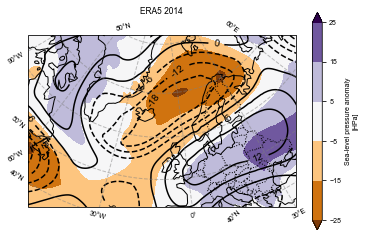

In [93]:
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
contourf = ERA5_mslp_anomaly.sel(time=2014).plot.contourf(levels= [-25, -15, -5,  5, 15, 25],
                                      extend = 'both',
                                      transform=ccrs.PlateCarree(),
                                      cmap=plt.cm.PuOr,
                                      ax=ax)
# for pathcoll in contourf.collections:
#     pathcoll.set_rasterized(True)
    
contours=ERA5_g500_anomaly.sel(time=2014).plot.contour(levels=range(-24, 24, 6), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--', x_inline = False, y_inline = False)
gl.top_labels = False
gl.right_labels  = False

gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
ax.set_title('ERA5 2014')# ax.gridlines(draw=True)
plt.savefig('../graphs/ERA5_circulation_2014.svg')

In [ ]:
extent_z500 = [-80, 35, 35, 80]

central_lon = np.mean(extent_z500[:2])
central_lat = np.mean(extent_z500[2:])

map_proj = ccrs.AlbersEqualArea(central_lon, central_lat,standard_parallels=(-60.0, 10.0))

# map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)



# plt.figure(figsize=(4, 9))
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw=True)
# Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), robust=True,ax=ax)
Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=Z500_flood2.sel(month=7).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlocator = cartopy.mpl.gridliner.mticker.FixedLocator([-120, -90, -60, -30])
# gl.ylocator = mticker.FixedLocator([-60, 20, 40, 60])
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
plt.show()



map_proj = ccrs.LambertConformal(central_lon, central_lat,standard_parallels=(-60.0, 10.0),cutoff =30)
ax = plt.axes(projection=map_proj)
ax.set_extent(extent_z500)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

Z500_anomaly2.sel(month=7).plot(transform=ccrs.PlateCarree(), cmap=plt.cm.PuOr, ax=ax)
contours=Z500_flood2.sel(month=7).plot.contour(levels=range(5400, 6000, 60), add_labels =True,transform=ccrs.PlateCarree(), colors = 'black',ax=ax)
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
gl=ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')

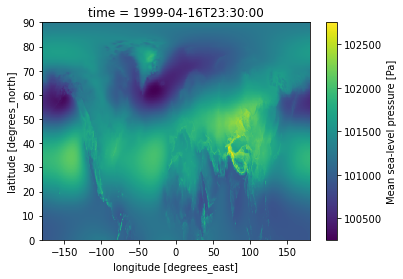

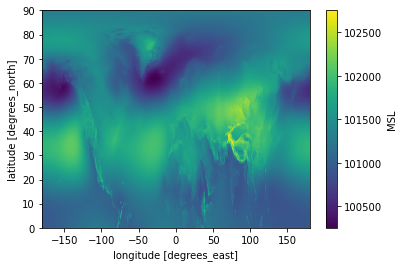

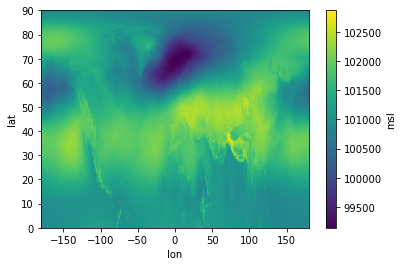

In [85]:
ERA5_mslp_mean = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/timmean.ERA5_SLP_1979_2018_SON.nc')
ERA5_mslp_mean['MSL'].load().plot()
plt.show()
ERA5_mslp = xr.open_dataset('https://thredds.met.no/thredds/dodsC/metusers/maltem/SALIENSEAS/TIMO/ERA5_SLP_1979_2018_SON.nc')
ERA5_mslp['MSL'].mean('time').plot()
plt.show()
ERA5_events['msl'].mean('time').plot()